# Introducing the Local Wavenumber Vector Concept to Sound Field Synthesis using Spherical / Circular Secondary Source Distributions

[Frank Schultz](https://orcid.org/0000-0002-3010-0294)

We want to show that HF/FarApprox NFC-oo Order Ambisonics == WFS in 2.5D and 3D SFS analytically as best as possible.

## Abstract

In [Ch. 4.4.2, Ahrens Book](http://doi.org/10.1007/978-3-642-25743-8) it was stated that Wave Field Synthesis (WFS) constitutes a high-frequency approximation of Near-field Compensated Infinite Order Ambisonics, shown for a 2.5D scenario.

In [Firtha IEEE TASLP 2018](https://doi.org/10.1109/TASLP.2018.2865091) we have shown precise equivalence - using linear array as secondary source distribution - of 2.5D WFS and a high-frequency/far-field approximation of the so called Spectral Division Method, which constitutes the explicit solution in cartesian coordinates.

We want to show analytically that high-frequency approximated Near-field Compensated Infinite Order Ambisonics, as the explicit solution in circular/spherical coordinates, is precisely equivalent with the 2.5D unified/3D WFS referencing to the origin. Altough some calculus can be found in [Ch. 4.4.2, Ahrens Book](http://doi.org/10.1007/978-3-642-25743-8), this needs to be revised for proper driving function handling and for missing aspects, such as the impact of secondary source selection window required for WFS vs. the smooth inherent Ambisonics windowing. Thus, the approach of [Firtha IEEE TASLP 2018](https://doi.org/10.1109/TASLP.2018.2865091) - using the local wavenumber vector concept - shall be adpated to spherical coordinates in hope for further insights to the links of WFS and HOA in 2.5D, potentially including pure panning approaches.

## Tools and Conventions

### sfs-python Toolbox 
We use the https://github.com/sfstoolbox/sfs-python toolbox. See the file CONTRIBUTING.rst for install help. Currently the development branch 'fs446' includes the latest code for this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sfs
%matplotlib inline 

### Coordinate System Convention
We use radius $r$, azimuth $\phi$, polar angle $\theta$ for which $x = r \cos\phi \sin\theta$, $y = r \sin\phi \sin\theta$, $z = r\cos\theta$, $\mathbf{x} = (x,y,z)^\mathrm{T}$ holds.

### Time Convention 
We use the $\mathrm{e}^{+ \mathrm{j} \omega t}$-time convention for monochromatic sound fields. Speed of sound is denoted by $c$, assuming constant 343 m/s here. The temporal angular frequency $\omega$ is linked to the frequency $f$ by $\omega=2 \pi f$.

### Point Source
The sound field of a radiating point source at position $\mathbf{x}_S$ is
$P(\mathbf{x},\omega) = \frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{S}|}}{|\mathbf{x}-\mathbf{x}_{S}|} \mathrm{e}^{+ \mathrm{j} \omega t}$.
Due to $\frac{1}{4 \pi}$-normalization this constitutes the 3D freefield Green's function. For derivation of point source driving functions we use this field $P(\mathbf{x},\omega)$ as target/primary sound field.

### Plane Wave

The sound field of a propagating plane wave into direction of unit vector $\mathbf{\hat{k}}_{PW}$ and unit amplitude is
$P(\mathbf{x},\omega) = \mathrm{e}^{- \mathrm{j} \frac{\omega}{c}\langle \mathbf{\hat{k}}_{PW}, \mathbf{x} \rangle} \mathrm{e}^{+ \mathrm{j} \omega t}$.

### Secondary Source Distribution
The secondary source distribution (SSD) is a circle positioned around origin consisting of 3D freefield Green's functions. Secondary source positions are denoted by $\mathbf{x}_0$, such that radius $r_0 = |\mathbf{x}_0|$. The inward unit normal at position $\mathbf{x}_0$ is given as $\mathbf{\hat{n}}_0(\mathbf{x}_0) = - \frac{\mathbf{x}_0}{r_0}$. In the remainder we use the $xy$-plane as SFS plane, thus $z$-components are zero in all vectors, i.e. $\theta=\frac{\pi}{2}$. We use the origin as the referencing point, i.e. $\mathbf{x}_{Ref}=(0,0,0)^\mathrm{T}$ and a circular SSD in $xy$-plane, described by $x_0=r_0\cos\phi$, $y_0=r_0\sin\phi$, $z=0$. 

### Simulation Setup NFC-HOA vs WFS
We prepare some setup and plot routine for the upcoming simulations here:

In [2]:
def plot_routine():
    L = len(x0)
    M = L/2
    k = omega / sfs.defs.c
    print("check that",R,"<",M / k,"to avoid spatial aliasing")
    
    plt.figure(figsize=(16, 9))

    plt.subplot(231)
    sfs.plot.soundfield(p_HOA, grid)
    sfs.plot.loudspeaker_2d(x0, n0, twin*0+1)
    
    if M/k < R:
        dphi = 2*np.pi/2**10
        phi = np.arange(0,2*np.pi,dphi)
        plt.plot(M/k*np.cos(phi),M/k*np.sin(phi),color=(0.5, 0.5, 0.5)) #plot circle of aliasing free region
    
    plt.grid()
    plt.title("HOA");

    plt.subplot(232)
    sfs.plot.soundfield(p_WFS, grid)
    sfs.plot.loudspeaker_2d(x0, n0, twin)
    plt.grid()
    plt.title("WFS");

    plt.subplot(233)
    sfs.plot.soundfield((p_WFS-p_HOA)/p_HOA, grid, xnorm=None, cmap='RdBu_r', vmin=-1e-1, vmax=+1e-1)
    sfs.plot.loudspeaker_2d(x0, n0, twin*0)
    plt.grid()
    plt.title("(WFS-HOA)/HOA");

    plt.subplot(234)
    sfs.plot.soundfield(20*np.log10(np.abs(p_HOA)), grid, xnorm=None, cmap='RdBu_r', vmin=-1e+1, vmax=+1e+1)
    sfs.plot.loudspeaker_2d(x0, n0, twin*0+1)
    plt.grid()
    plt.title("|HOA| in dB");

    plt.subplot(235)
    sfs.plot.soundfield(20*np.log10(np.abs(p_WFS)), grid, xnorm=None, cmap='RdBu_r', vmin=-1e1, vmax=+1e1)
    sfs.plot.loudspeaker_2d(x0, n0, twin)
    plt.grid()
    plt.title("|WFS| in dB");

    plt.subplot(236)
    sfs.plot.soundfield(20*np.log10(np.abs((p_WFS-p_HOA)/p_HOA)), grid, xnorm=None, cmap='magma_r', 
                        vmin=-60, vmax=+0)
    sfs.plot.loudspeaker_2d(x0, n0, twin*0)
    plt.grid()
    plt.title("|(WFS-HOA)/HOA| in dB");
   
    plt.figure(figsize=(16, 9))
    plt.subplot(211)
    plt.plot(20*np.log10( np.abs(d_HOA * a0) ), "r", label="|HOA|")
    plt.plot(20*np.log10( np.abs(d_WFS * twin * a0) ), "b", label="|WFS|")
    plt.plot(20*np.log10( np.abs(d_HOA * a0) - np.abs(d_WFS * twin * a0) ), "c", label="|HOA|-|WFS|")
    plt.plot(20*np.log10(np.abs(((d_WFS * twin * a0)-(d_HOA * a0)) / (d_HOA * a0))), "k", label="|(WFS-HOA)/HOA|")
    plt.legend()
    plt.grid()
    plt.xlabel('x0')
    plt.ylabel('dB')
    plt.title('driving function')
    plt.subplot(212)
    plt.plot(np.angle(d_HOA * a0), "r", label="HOA")
    plt.plot(np.angle(d_WFS * twin * a0), "b", label="WFS")
    plt.plot(np.angle(d_HOA * a0) - np.angle(d_WFS * twin * a0), "c", label="$\phi$(HOA)-$\phi$(WFS)")
    plt.legend()
    plt.grid()
    plt.xlabel('x0')
    plt.ylabel('phi(D)');

    print("HOA Mag at P(0,0):", np.abs(sfs.util.probe(p_HOA, grid, [0,0,0])))
    print("WFS Mag at P(0,0):", np.abs(sfs.util.probe(p_WFS, grid, [0,0,0])))

    print("HOA Phi at P(0,0):", np.angle(sfs.util.probe(p_HOA, grid, [0,0,0])))
    print("WFS Phi at P(0,0):", np.angle(sfs.util.probe(p_WFS, grid, [0,0,0])))    
    print("f =",f,"Hz")
    #print("lambda =", sfs.defs.c / f, "m, distance PS to SSD =",np.linalg.norm(xs)-R,"m")
    print("kR =",2*np.pi/wavelength * R) #kR >> 1
    
#generic stuff for SFS
R = 10/9 # radius of spherical/circular array in m
wavelength = R/7 # lambda in m
N = 2**9 # number of secondary sources
xref = [0, 0, 0] # reference position for 2.5D
f = sfs.defs.c / wavelength # frequency in Hz
omega = 2 * np.pi * f # angular temporal frequency in rad/s
grid = sfs.util.xyz_grid([-R, R], [-R, R], 0, spacing = wavelength/16)
x0, n0, a0 = sfs.array.circular(N, R)
#a0[1:N] = 0

## Driving Functions

### General 2.5D WFS driving function (cf. [Firtha IEEE TASLP 2017](https://doi.org/10.1109/TASLP.2017.2689245), [Firtha IEEE TASLP 2018](https://doi.org/10.1109/TASLP.2018.2865091), Winter IEEE TASLP 2019)
The driving function according to unified 2.5D Wave Field Synthesis (WFS) theory reads

$D(\mathbf{x}_0,\omega) = w(\mathbf{x}_0) \sqrt{\frac{\mathrm{j} \omega}{c}} \sqrt{8 \pi} \sqrt{d(\mathbf{x}_0)}
\langle \mathbf{\hat{k}}_S(\mathbf{x}_0), \mathbf{\hat{n}}_0(\mathbf{x}_0)\rangle S(\mathbf{x}_0,\omega)$

with the referencing function $d(\mathbf{x}_0)$ and the local wavenumber vector $\mathbf{\hat{k}}_S(\mathbf{x}_0)$ of the sound field $S(\mathbf{x}_0)$ at position $\mathbf{x}_0$. Inherent to all 2.5D WFS driving functions is the $\sqrt{\mathrm{j} \omega}$ prefilter with 3 dB per octave highpass characteristics and +45 deg phase shift for all frequencies, cf. Ch. 2.5 in [Schultz Thesis 2016](https://doi.org/10.18453/rosdok_id00001765).

### Point Source 2.5D WFS driving function (cf. [Schultz Thesis 2016](https://doi.org/10.18453/rosdok_id00001765), Winter IEEE TASLP 2019)
Using the normalized local wavenumber vector $\mathbf{\hat{k}}_S(\mathbf{x}_0) = \frac{\mathbf{x}_0-\mathbf{x}_{S}}{|\mathbf{x}_0-\mathbf{x}_{S}|}$ of the point source and the referencing function
$d(\mathbf{x}_0) = \frac{|\mathbf{x}_0-\mathbf{x}_{S}| \cdot |\mathbf{x}_{Ref}-\mathbf{x}_{0}|}{|\mathbf{x}_0-\mathbf{x}_{S}| + |\mathbf{x}_{Ref}-\mathbf{x}_{0}|}$,
as well as for desired field
$S(\mathbf{x},\omega) == P(\mathbf{x},\omega)$ deploying $S(\mathbf{x}_0,\omega)$ on the SSD,
yields the 2.5D WFS driving function for a point source with referencing to position $\mathbf{x}_{Ref}$

$D(\mathbf{x}_0,\omega) = w(\mathbf{x}_0) \sqrt{\frac{\mathrm{j \omega}}{c}} \sqrt{8 \pi}
\sqrt{\frac{|\mathbf{x}_0-\mathbf{x}_{S}| \cdot |\mathbf{x}_{Ref}-\mathbf{x}_{0}|}{|\mathbf{x}_0-\mathbf{x}_{S}| + |\mathbf{x}_{Ref}-\mathbf{x}_{0}|}}
\frac{\langle \mathbf{x}_0-\mathbf{x}_{S}, \mathbf{\hat{n}}_0(\mathbf{x}_0)\rangle}{|\mathbf{x}_0-\mathbf{x}_{S}|}
\frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}_0-\mathbf{x}_{S}|}}{|\mathbf{x}_0-\mathbf{x}_{S}|}$,

cf. eq. (2.137) in the cited thesis. 

The secondary source selection (spatial window) is defined as
$w(\mathbf{x}_0) \qquad = 1\,\,\text{if} \langle \mathbf{\hat{k}}_S(\mathbf{x}_0),\mathbf{\hat{n}}_0(\mathbf{x}_0)\rangle, \qquad 0\,\,\text{otherwise}$.

This driving function is implemented in function wfs_25d_point_Unified_WIP() currently in the branch 'fs446' using the variables
$ds = \mathbf{x}_0-\mathbf{x}_{S}$, $dr = \mathbf{x}_{Ref}-\mathbf{x}_{0}$,
$s = |\mathbf{x}_0-\mathbf{x}_{S}|$, $r = |\mathbf{x}_{Ref}-\mathbf{x}_{0}|$
for sake of brevity. It then reads

$D(\mathbf{x}_0,\omega) = w(\mathbf{x}_0) \sqrt{\frac{\mathrm{j \omega}}{c}} \sqrt{8 \pi}
\sqrt{\frac{r \cdot s}{r + s}}
\frac{\langle ds, \mathbf{\hat{n}}_0(\mathbf{x}_0)\rangle}{s}
\frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} s}}{s}$.

### Point Source  2.5D NFC-HOA driving function (cf. [Ahrens Book](http://doi.org/10.1007/978-3-642-25743-8))
The 2.5D nearfield-compensated higher-order Ambisonics (NFC-HOA) driving function (cf. eq. (5.8) in the cited book) reads

$D(\mathbf{x}_0,\omega) = \frac{1}{2 \pi r_0} \sum\limits_{m=-M}^{+M} \frac{h^{(2)}_{|m|}(\frac{\omega}{c} r_S)}{h^{(2)}_{|m|}(\frac{\omega}{c} r_0)} \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_S)}$

using spherical Hankel function $h_\nu^{(2)}(\cdot)$ of second kind of order $\nu$. Summation up to modal order $M\leq \frac{L}{2}$ for $L$ secondary sources in use is proposed to avoid spatial aliasing. In the sfs-python toolbox this function is implemented in function nfchoa_25d_point().

### Plane Wave 2.5D WFS driving function (cf. [Schultz Thesis 2016](https://doi.org/10.18453/rosdok_id00001765), Winter IEEE TASLP 2019)

The 2.5D unified WFS driving function for a plane wave referencing to point $\mathbf{x}_{Ref}$ is given as

$D(\mathbf{x}_0,\omega) = w(\mathbf{x}_0) \sqrt{\frac{\mathrm{j \omega}}{c}} \sqrt{8 \pi} \cdot
\sqrt{|\mathbf{x}_{Ref}-\mathbf{x}_{0}|} \cdot
\langle \mathbf{\hat{k}}_{PW}, \mathbf{\hat{n}}(\mathbf{x}_0) \rangle \cdot
\mathrm{e}^{- \mathrm{j} \frac{\omega}{c}\langle \mathbf{\hat{k}}_{PW}, \mathbf{x}_0 \rangle}$,

cf. eq. (2.177) in the cited thesis. The referencing function is given as $d(\mathbf{x}_0) = |\mathbf{x}_{Ref}-\mathbf{x}_{0}|$, cf. [Firtha IEEE TASLP 2017](https://doi.org/10.1109/TASLP.2017.2689245).

The secondary source selection (spatial window) is defined as
$w(\mathbf{x}_0) \qquad = 1\,\,\text{if} \langle \mathbf{\hat{k}}_{PW}(\mathbf{x}_0),\mathbf{\hat{n}}_0(\mathbf{x}_0)\rangle, \qquad 0\,\,\text{otherwise}$.

#### Plane Wave 2.5D NFC-HOA driving function (cf. [Ahrens Book](http://doi.org/10.1007/978-3-642-25743-8))

The 2.5D NFC-HOA driving function for a plane wave reads (cf. eq. (5.1) in the cited book, corrected here)

$D(\mathbf{x}_0,\omega) = \sum\limits_{m=-M}^{+M} \frac{2 \mathrm{j}}{\frac{\omega}{c} r_0} \frac{(-\mathrm{j})^{|m|}}{h_{|m|}^{(2)}(\frac{\omega}{c} r_0)} \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PW})}$.

## NFC-HOA vs. WFS

### Spherical Wave / Point Source NFC-HOA vs. WFS

check that 1.1111111111111112 < 6.467248481194478 to avoid spatial aliasing


/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10


HOA Mag at P(0,0): 0.9999999999999988
WFS Mag at P(0,0): 0.9984926360543087
HOA Phi at P(0,0): -1.8391701769664952e-13
WFS Phi at P(0,0): 0.006482239154538514
f = 2160.8999999999996 Hz
kR = 43.982297150257104
lambda = 0.15873015873015875 m, distance PS to SSD = 158.73015873015876 m


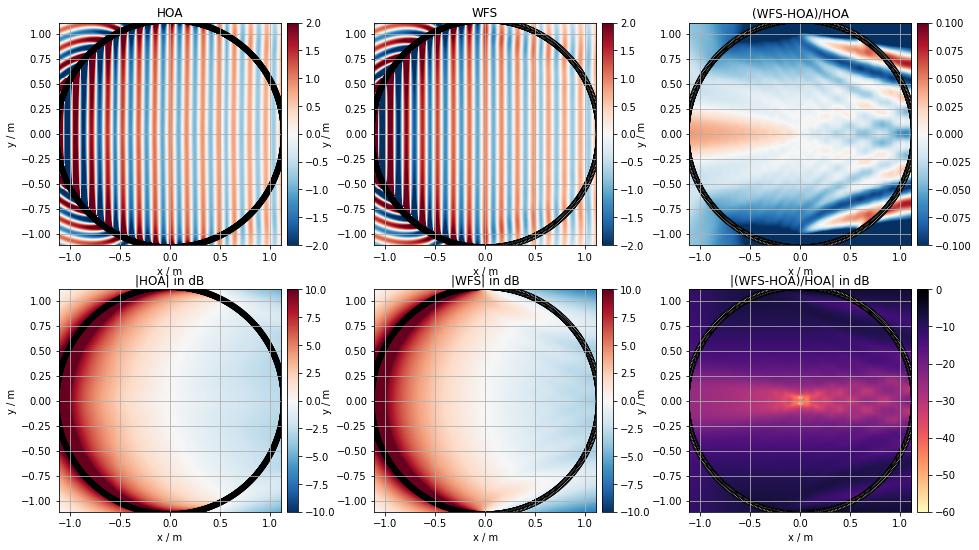

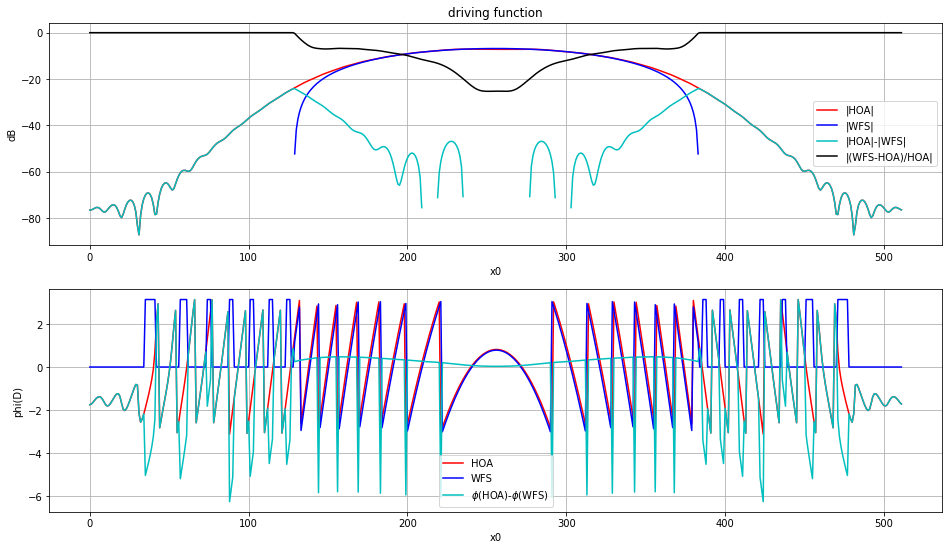

In [3]:
#SPHERICAL WAVE
xs = [-(1000*wavelength+R), 0, 0]  # position of virtual source
A = np.linalg.norm(xs) * 4 * np.pi # amplitude point source, i.e. amplitude 1 at origin

a = sfs.mono.drivingfunction.source_selection_point(n0, x0, xs)
twin = sfs.tapering.none(a)

d_HOA = A*sfs.mono.drivingfunction.nfchoa_25d_point(omega, x0, R, xs)
p_HOA = sfs.mono.synthesized.generic(omega, x0, n0, d_HOA * a0 , grid, source=sfs.mono.source.point)

d_WFS = A*sfs.mono.drivingfunction.wfs_25d_point_Unified_WIP(omega, x0, n0, xs)
p_WFS = sfs.mono.synthesized.generic(omega, x0, n0, d_WFS * twin * a0 , grid, source=sfs.mono.source.point)

plot_routine()
print("lambda =", sfs.defs.c / f, "m, distance PS to SSD =",np.linalg.norm(xs)-R,"m")

### Plane Wave NFC-HOA vs. WFS

check that 1.1111111111111112 < 6.467248481194478 to avoid spatial aliasing


/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10


HOA Mag at P(0,0): 0.9999999999999994
WFS Mag at P(0,0): 0.9981031044458705
HOA Phi at P(0,0): 1.5833694795022124e-13
WFS Phi at P(0,0): 0.006558539021632781
f = 2160.8999999999996 Hz
kR = 43.982297150257104


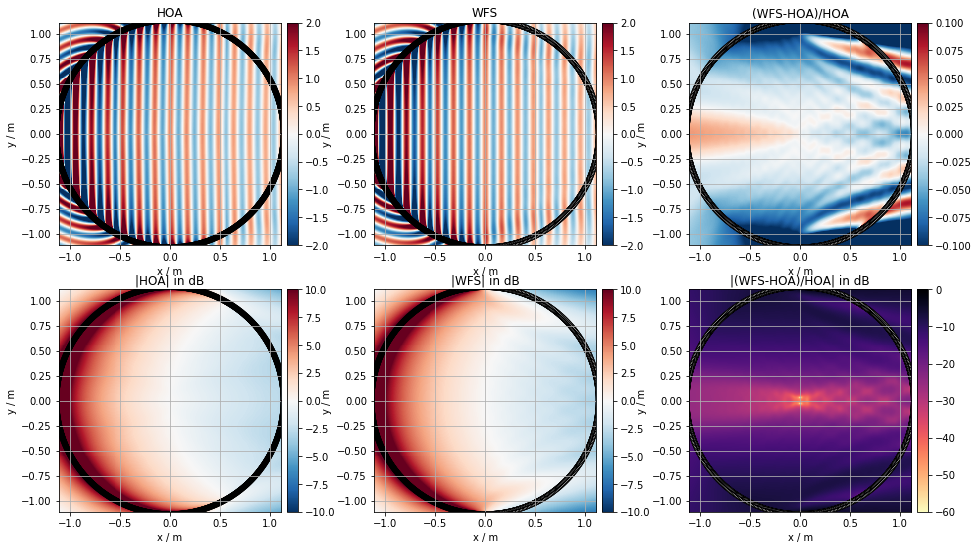

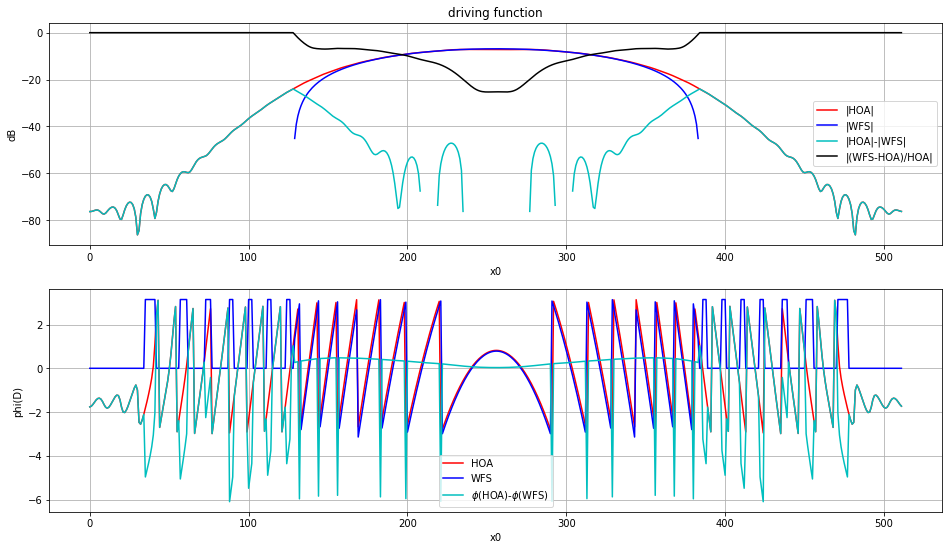

In [4]:
#PLANE WAVE
pw_angle = 0  # propagating direction of plane wave in deg
npw = sfs.util.direction_vector(np.radians(pw_angle), np.radians(90))
A = 1 # i.e. amplitude 1 at origin

a = sfs.mono.drivingfunction.source_selection_plane(n0, npw)
twin = sfs.tapering.none(a)

d_HOA = A*sfs.mono.drivingfunction.nfchoa_25d_plane(omega, x0, R, npw)
p_HOA = sfs.mono.synthesized.generic(omega, x0, n0, d_HOA * a0 , grid, source=sfs.mono.source.point)

d_WFS = A*sfs.mono.drivingfunction.wfs_25d_plane(omega, x0, n0, npw, xref)
p_WFS = sfs.mono.synthesized.generic(omega, x0, n0, d_WFS * twin * a0 , grid, source=sfs.mono.source.point)

plot_routine()

## FarField/HF NFC-HOA vs. WFS

### Spherical Wave / Point Source
FarField/HF NFC-HOA vs. WFS

The spherical Hankel functions can be approximated for very large arguments as [eq. (6.68) in Williams Fourier](https://doi.org/10.1016/B978-0-12-753960-7.X5000-1)

$h_\nu^{(2)} = \mathrm{j}^{\nu+1} \frac{\mathrm{e}^{-\mathrm{j} x}}{x}$.

Consider this for the driving function above yields

$D(\mathbf{x}_0,\omega)
= \frac{1}{2 \pi r_0} \sum\limits_{m=-M}^{+M} \frac{h^{(2)}_{|m|}(\frac{\omega}{c} r_S)}{h^{(2)}_{|m|}(\frac{\omega}{c} r_0)} \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_S)}
\approx
\frac{1}{2 \pi r_0} \sum\limits_{m=-M}^{+M}
\frac
{\mathrm{j}^{|m|+1} \frac{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}{\frac{\omega}{c} r_S}}
{\mathrm{j}^{|m|+1} \frac{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}{\frac{\omega}{c} r_0}}
\mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_S)}
=
\frac{1}{2 \pi r_0} \sum\limits_{m=-M}^{+M}
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{r_0}{r_S}
\mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_S)}
$

We move terms out of the sum
$
D(\mathbf{x}_0,\omega) =
\frac{1}{2 \pi r_0}
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{r_0}{r_S}
\sum\limits_{m=-M}^{+M}
\mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_S)}
$
and identify the sum of exponentials as [Dirichlet kernel](https://en.wikipedia.org/wiki/Dirichlet_kernel). For $M\rightarrow \infty$ (i.e. using infinite order Ambisonics as intended in the first instance) this kernel merges to the Dirac distribution and thus

$
D(\mathbf{x}_0,\omega) =
\frac{1}{r_0}
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{r_0}{r_S}
\delta(\phi_0 - \phi_S).
$

This driving function has interesting implications that correspond to the findings in [Ch. 4 Firtha thesis](https://github.com/gfirtha/gfirtha_phd_thesis), [Firtha IEEE TASLP 2017](https://doi.org/10.1109/TASLP.2017.2689245):

* only one secondary source is active, i.e. precisely the one for which $\phi_0 =  \phi_S$ holds. This is the stationary phase point denoted here with $\mathbf{x}_0^* = (r_0 \sin(\phi_S), r_0 \cos(\phi_S), 0)^\mathrm{T}$.

* there is an amplitude correction factor, that matches the amplitude of the intended virtual source in the origin, i.e. compensating amplitude decay of secondary source by $r_0$ and instead applying decay of virtual source by $\frac{1}{r_S}$

* same correction is applied for the phase in the origin, compensation of the secondary source propagating time by $\mathrm{e}^{+\mathrm{j} \frac{\omega}{c} r_0}$ and instead applying $\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}$ as delay for the intended virtual source.

This might become celarer if inserting this driving function into the synthesis integral (i.e. single layer potential)
$P(\mathbf{x},\omega) = \int\limits_{\phi_0=0}^{2 \pi} D(\mathbf{x}_0,\omega) \frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{0}|}}{|\mathbf{x}-\mathbf{x}_{0}|} r_0 \mathrm{d}\phi_0$,
which yields
$P(\mathbf{x},\omega) = \int\limits_{\phi_0=0}^{2 \pi} \frac{1}{r_0}
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{r_0}{r_S}
\delta(\phi_0 - \phi_S) \frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{0}|}}{|\mathbf{x}-\mathbf{x}_{0}|} r_0 \mathrm{d}\phi_0=
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{r_0}{r_S}
\frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{0}^*|}}{|\mathbf{x}-\mathbf{x}_{0}^*|}.
$

In the origin $|\mathbf{x}-\mathbf{x}_{0}^*|=r_0$ holds and thus
$P(\mathbf{0},\omega) = 
\frac
{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_S}}
{4 \pi r_S}
$
remains as expected value for the pressure there.

We see:

A single secondary source, i.e. the source of stationary phase, at position $\mathbf{x}_{0}^*$ produces a spherical wave front that matches for the origin's position in magnitude and phase with the intended virtual point source at position $\mathbf{x}_{S}$. At all other positions amplitude and potentially phase errors will occur, since the wavefront of a single secondary source is not able not reproduce the intended wavefront of the virtual source. Only, along the line $\mathbf{x}_S$ to the origin $\mathbf{0}$ the phase of the wavefront is correct as well, however exhibiting the typical 2.5D SFS amplitude errors.

The simulation below demonstrates this behaviour with the high-frequency approximated NFC Infinite Order Ambisonics driving function implemented in the nfchoa_25d_point_HF() function.

check that 1.1111111111111112 < 6.467248481194478 to avoid spatial aliasing


/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


HOA Mag at P(0,0): 1.0000000000000038
WFS Mag at P(0,0): 0.9984926360543087
HOA Phi at P(0,0): -1.796817761077832e-13
WFS Phi at P(0,0): 0.006482239154538514
f = 2160.8999999999996 Hz
kR = 43.982297150257104
lambda = 0.15873015873015875 m, distance PS to SSD = 158.73015873015876 m


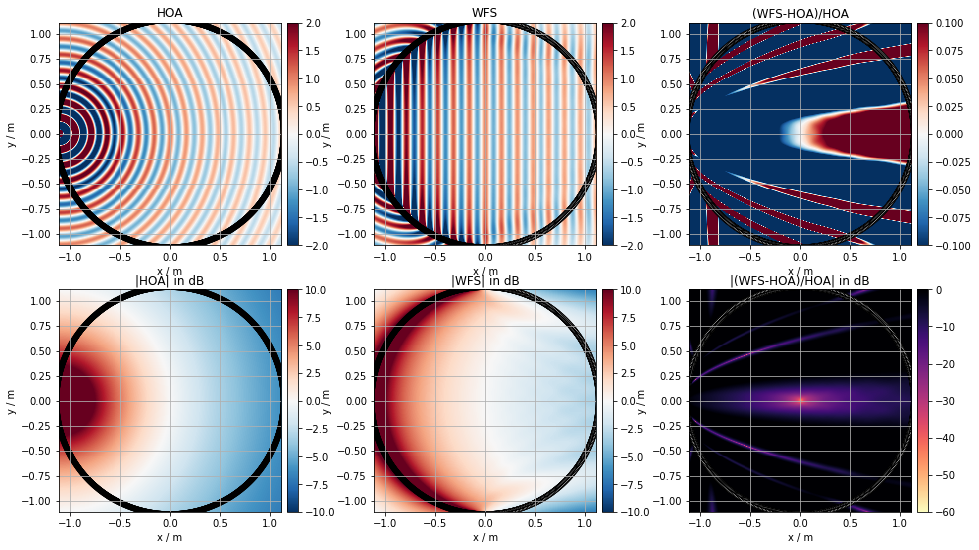

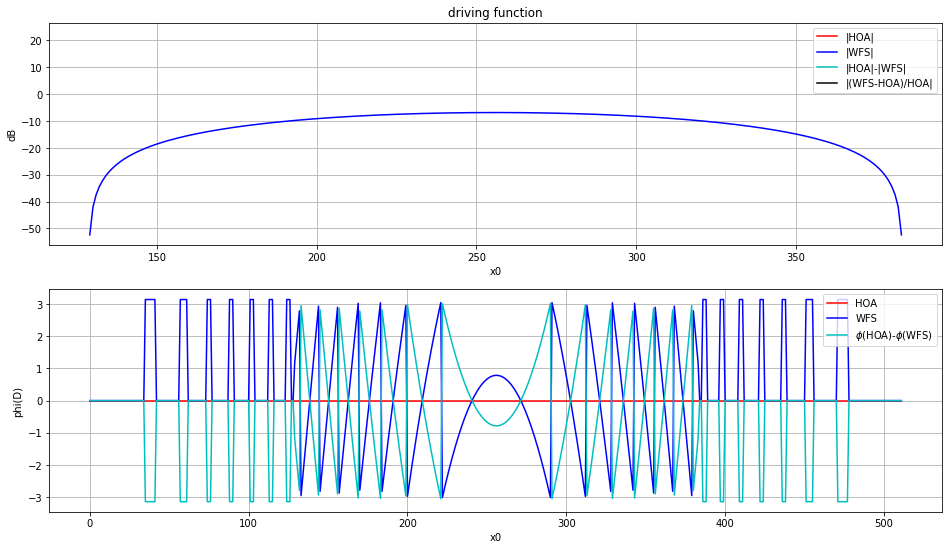

In [5]:
#SPHERICAL WAVE
xs = [-(1000*wavelength+R), 0, 0]  # position of virtual source
A = np.linalg.norm(xs) * 4 * np.pi # amplitude point source, i.e. amplitude 1 at origin

a = sfs.mono.drivingfunction.source_selection_point(n0, x0, xs)
twin = sfs.tapering.none(a)

d_HOA = A*sfs.mono.drivingfunction.nfchoa_25d_point_HF(omega, x0, R, xs,DirichletKernelFlag=False)
#d_HOA = A*sfs.mono.drivingfunction.nfchoa_25d_point(omega, x0, R, xs)
p_HOA = sfs.mono.synthesized.generic(omega, x0, n0, d_HOA * a0 , grid, source=sfs.mono.source.point)

d_WFS = A*sfs.mono.drivingfunction.wfs_25d_point_Unified_WIP(omega, x0, n0, xs)
p_WFS = sfs.mono.synthesized.generic(omega, x0, n0, d_WFS * twin * a0 , grid, source=sfs.mono.source.point)

plot_routine()
print("lambda =", sfs.defs.c / f, "m, distance PS to SSD =",np.linalg.norm(xs)-R,"m")

### Plane Wave
FarField/HF NFC-HOA vs. WFS

The same calculus using [eq. (6.68) in Williams Fourier](https://doi.org/10.1016/B978-0-12-753960-7.X5000-1)

$h_\nu^{(2)} = \mathrm{j}^{\nu+1} \frac{\mathrm{e}^{-\mathrm{j} x}}{x}$.

$\mathrm{j}^{|m|+1} \frac{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}{\frac{\omega}{c} r_0}$.

is performed for the NFC-HOA plane wave driving function

$D(\mathbf{x}_0,\omega) = \sum\limits_{m=-M}^{+M} \frac{2 \mathrm{j}}{\frac{\omega}{c} r_0} \frac{(-\mathrm{j})^{|m|}}{\mathrm{j}^{|m|+1} \frac{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}{\frac{\omega}{c} r_0}} \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PW})}$.

Reordering yields

$D(\mathbf{x}_0,\omega) =
\frac{2}{\frac{\omega}{c} r_0} \frac{\frac{\omega}{c} r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\sum\limits_{m=-M}^{+M} \frac{\mathrm{j} (-\mathrm{j})^{|m|}}{\mathrm{j}^{|m|+1}} \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PW})}
=
\frac{2}{r_0} \frac{r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\sum\limits_{m=-M}^{+M} \mathrm{e}^{\mathrm{j} \pi m} \, \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PW})}
$.

Since $\phi_{PW}$ indicates the propagating direction of the plane wave, we introduce the angle $\phi_{PWi} = \phi_{PW} - \pi$ for plane wave incidence. Inserting results in

$D(\mathbf{x}_0,\omega)=
\frac{2}{r_0} \frac{r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\sum\limits_{m=-M}^{+M} \mathrm{e}^{\mathrm{j} \pi m} \, \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PWi} - \pi)}
=
\frac{2}{r_0} \frac{r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\sum\limits_{m=-M}^{+M} \, \mathrm{e}^{\mathrm{j} m (\phi_0 - \phi_{PWi})}
$
obtaining the Dirichlet kernel again. For $M\rightarrow \infty$ the kernel merges to the Dirac distribution
$D(\mathbf{x}_0,\omega)=
2 \pi \frac{2}{r_0} \frac{r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\delta(\phi_0 - \phi_{PWi})
=
\frac{1}{r_0} \frac{4 \pi r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\delta(\phi_0 - \phi_{PWi})
$.

We see again, that the driving function 
* activates only one single secondary source $\mathbf{x}_0^*$, i.e. of the stationary phase where $\phi_0 = \phi_{PWi}$
* compensates the amplitude decay of this source towards the plane wave amplitude in the origin, i.e. 1
* compensates the phase shift of this source towards the phase shift of the plane wave in the origin, i.e. 0

Introducing the driving function into the synthesis integral

$P(\mathbf{x},\omega) = \int\limits_{\phi_0=0}^{2 \pi} 
\frac{1}{r_0} \frac{4 \pi r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\delta(\phi_0 - \phi_{PWi})
\frac{1}{4\pi} \frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{0}|}}{|\mathbf{x}-\mathbf{x}_{0}|} r_0 \mathrm{d}\phi_0
=
\frac{r_0}{\mathrm{e}^{-\mathrm{j} \frac{\omega}{c} r_0}}
\frac{\mathrm{e}^{- \mathrm{j} \frac{\omega}{c} |\mathbf{x}-\mathbf{x}_{0}^*|}}{|\mathbf{x}-\mathbf{x}_{0}^*|}
$

In the origin $|\mathbf{x}-\mathbf{x}_{0}^*|=r_0$ holds and thus
$P(\mathbf{0},\omega) = 1
$
remains as expected value for the pressure there.

check that 1.1111111111111112 < 6.467248481194478 to avoid spatial aliasing


/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/Users/fs446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


HOA Mag at P(0,0): 1.0000000000000036
WFS Mag at P(0,0): 0.9981031044458705
HOA Phi at P(0,0): 1.6342482922482304e-13
WFS Phi at P(0,0): 0.006558539021632781
f = 2160.8999999999996 Hz
kR = 43.982297150257104


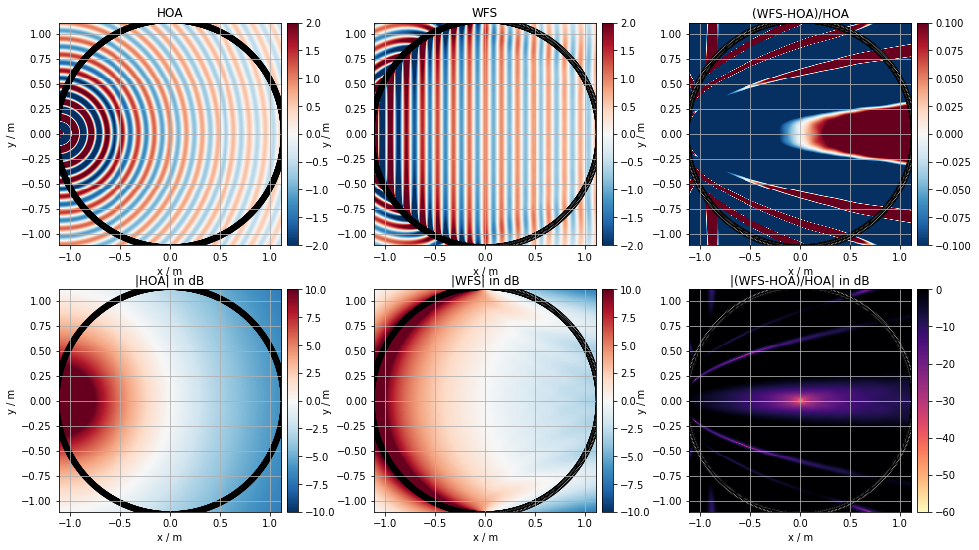

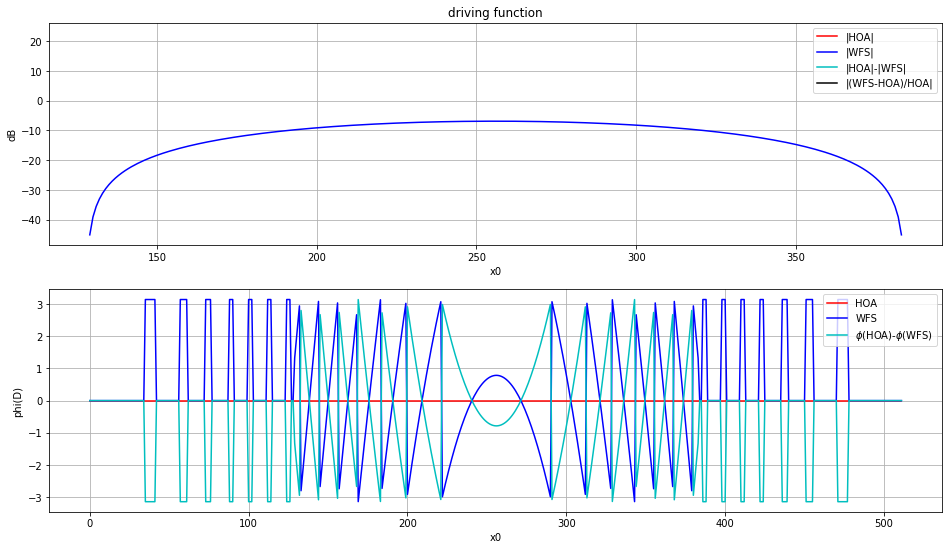

In [6]:
#PLANE WAVE
pw_angle = 0  # propagating direction of plane wave in deg
npw = sfs.util.direction_vector(np.radians(pw_angle), np.radians(90))
A = 1 # i.e. amplitude 1 at origin

a = sfs.mono.drivingfunction.source_selection_plane(n0, npw)
twin = sfs.tapering.none(a)

d_HOA = A*sfs.mono.drivingfunction.nfchoa_25d_plane_HF(omega, x0, R, npw, DirichletKernelFlag=False)
p_HOA = sfs.mono.synthesized.generic(omega, x0, n0, d_HOA * a0 , grid, source=sfs.mono.source.point)

d_WFS = A*sfs.mono.drivingfunction.wfs_25d_plane(omega, x0, n0, npw, xref)
p_WFS = sfs.mono.synthesized.generic(omega, x0, n0, d_WFS * twin * a0 , grid, source=sfs.mono.source.point)

plot_routine()

#### Copyright
This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work with the github repository url.